In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

# Load test module for sanity check
from test_utils import test

Data Generation
===

In [2]:
np.random.seed(10)
P, Q = (np.random.rand(i, 2) for i in (4, 5))
P_big, Q_big = (np.random.rand(i, 80) for i in (100, 120))

print(P, "\n\n", Q)

[[0.77132064 0.02075195]
 [0.63364823 0.74880388]
 [0.49850701 0.22479665]
 [0.19806286 0.76053071]] 

 [[0.16911084 0.08833981]
 [0.68535982 0.95339335]
 [0.00394827 0.51219226]
 [0.81262096 0.61252607]
 [0.72175532 0.29187607]]


Solution
===

In [79]:
def naive(P, Q):
    """
    A naive solution for finding pairvise distances between poins in P and Q
    
    Args:
        P: numpy array of shape=(p, 2)
        Q: numpy array of shape=(q, 2)
    Returns:
        D: numpy array of shape=(p*q,)
        
    >>> naive(np.array([[0, 1]]), np.array([[2, 3], [4, 5]]))
    array([[2.82842712, 5.65685425]])
    """
    # ***************************************************
    # INSERT YOUR CODE HERE
    # Calculate the sum of squares for each matrix
    
    # TODO Here it only works because the (1,2) matrix can be broadcast easily, but otherwise it doesn't work
    
    q_height = Q.shape[0]
    result = np.zeros(P.shape[0] * q_height)
    for i, x in enumerate(P):
        for j, y in enumerate(Q):
            result[i*q_height+j] = np.sqrt(np.sum((x - y)**2))

    return result[np.newaxis,:]
    
    # ***************************************************

test(naive)

✅ Your `naive` passed 1 tests.


### Use matching indices

Instead of iterating through indices, one can use them directly to parallelize the operations with Numpy.

In [22]:
rows, cols = np.indices((P.shape[0], Q.shape[0]))
print(rows, end="\n\n")
print(cols)

[[0 0 0 0 0]
 [1 1 1 1 1]
 [2 2 2 2 2]
 [3 3 3 3 3]]

[[0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]]


In [23]:
print(P[rows.ravel()], end="\n\n")
print(Q[cols.ravel()])

[[0.77132064 0.02075195]
 [0.77132064 0.02075195]
 [0.77132064 0.02075195]
 [0.77132064 0.02075195]
 [0.77132064 0.02075195]
 [0.63364823 0.74880388]
 [0.63364823 0.74880388]
 [0.63364823 0.74880388]
 [0.63364823 0.74880388]
 [0.63364823 0.74880388]
 [0.49850701 0.22479665]
 [0.49850701 0.22479665]
 [0.49850701 0.22479665]
 [0.49850701 0.22479665]
 [0.49850701 0.22479665]
 [0.19806286 0.76053071]
 [0.19806286 0.76053071]
 [0.19806286 0.76053071]
 [0.19806286 0.76053071]
 [0.19806286 0.76053071]]

[[0.16911084 0.08833981]
 [0.68535982 0.95339335]
 [0.00394827 0.51219226]
 [0.81262096 0.61252607]
 [0.72175532 0.29187607]
 [0.16911084 0.08833981]
 [0.68535982 0.95339335]
 [0.00394827 0.51219226]
 [0.81262096 0.61252607]
 [0.72175532 0.29187607]
 [0.16911084 0.08833981]
 [0.68535982 0.95339335]
 [0.00394827 0.51219226]
 [0.81262096 0.61252607]
 [0.72175532 0.29187607]
 [0.16911084 0.08833981]
 [0.68535982 0.95339335]
 [0.00394827 0.51219226]
 [0.81262096 0.61252607]
 [0.72175532 0.29187607

In [80]:
def with_indices(P, Q):
    """
    An optimized solution using matching indices
    
    Args:
        P: numpy array of shape=(p, 2)
        Q: numpy array of shape=(q, 2)
    Returns:
        D: numpy array of shape=(p*q,)
        
    >>> with_indices(np.array([[0, 1]]), np.array([[2, 3], [4, 5]]))
    array([[2.82842712, 5.65685425]])
    """
    # ***************************************************
    # INSERT YOUR CODE HERE
    rows, cols = np.indices((P.shape[0], Q.shape[0]))
    P_row = P[rows.ravel()]
    Q_col = Q[cols.ravel()]
    return np.sqrt(np.sum((Q_col - P_row)**2, axis=1))[np.newaxis,:]
    # ***************************************************

test(with_indices)

✅ Your `with_indices` passed 1 tests.


### Use a library

`scipy` is the equivalent of matlab toolboxes and have a lot to offer. Actually the pairwise computation is part of the library through the `spatial` module.

In [71]:
from scipy.spatial.distance import cdist


def scipy_version(P, Q):
    return cdist(P, Q)

### Numpy Magic

In [70]:
print((P[:, np.newaxis] - Q[np.newaxis, :]) ** 2)
x= np.sqrt(np.sum((P[:, np.newaxis] - Q[np.newaxis, :]) ** 2, axis=2))
print(x)

[[[3.62656651e-01 4.56811947e-03]
  [7.38926342e-03 8.69819975e-01]
  [5.88860365e-01 2.41513582e-01]
  [1.70571630e-03 3.50196606e-01]
  [2.45672153e-03 7.35082878e-02]]

 [[2.15794994e-01 4.36212786e-01]
  [2.67408786e-03 4.18568486e-02]
  [3.96522050e-01 5.59850583e-02]
  [3.20312369e-02 1.85716431e-02]
  [7.76285799e-03 2.08783028e-01]]

 [[1.08501841e-01 1.86204668e-02]
  [3.49139711e-02 5.30853152e-01]
  [2.44588353e-01 8.25962412e-02]
  [9.86675732e-02 1.50334104e-01]
  [4.98398057e-02 4.49964894e-03]]

 [[8.38219937e-04 4.51840603e-01]
  [2.37458321e-01 3.71959956e-02]
  [3.76804773e-02 6.16719852e-02]
  [3.77681654e-01 2.19053751e-02]
  [2.74253785e-01 2.19637175e-01]]]
[[0.60599073 0.93659449 0.91124856 0.59321356 0.27561751]
 [0.80746999 0.21102354 0.67268649 0.22495084 0.46534491]
 [0.35654215 0.75217493 0.57200052 0.49900068 0.23310825]
 [0.67281411 0.52407472 0.31520226 0.63212897 0.70277376]]


In [86]:
def tensor_broadcasting(P, Q):
    return np.sqrt(np.sum((P[:, np.newaxis, :] - Q[np.newaxis, :, :]) ** 2, axis=2))


# Compare methods

In [87]:
methods = [
    naive,
    #naive_2,
    with_indices,
    #with_indices_2,
    scipy_version,
    tensor_broadcasting,
]
timers = []
for f in methods:
    r = %timeit -o f(P_big, Q_big)
    timers.append(r)

46 ms ± 257 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
5.15 ms ± 8.69 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
292 µs ± 1.63 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
1.51 ms ± 8.07 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


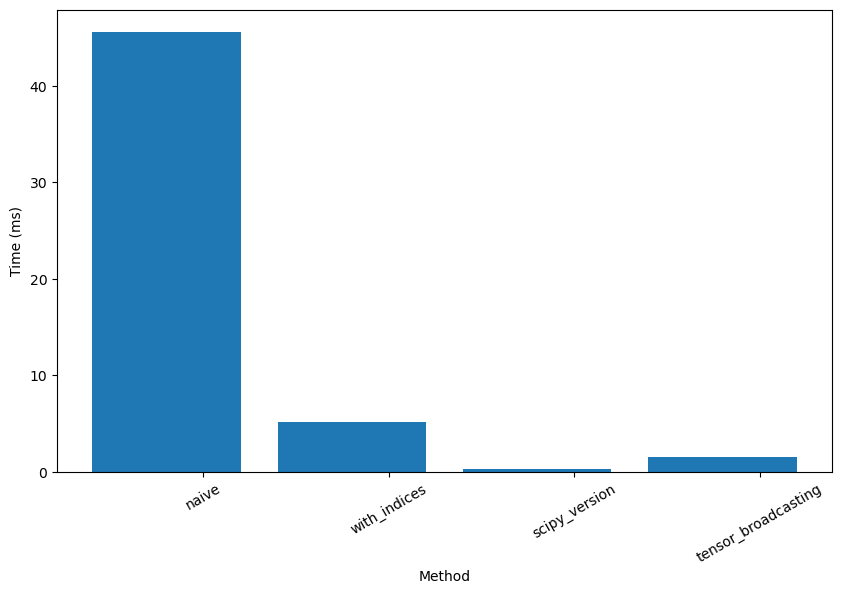

In [88]:
plt.figure(figsize=(10, 6))
plt.bar(
    np.arange(len(methods)), [r.best * 1000 for r in timers], log=False
)  # Set log to True for logarithmic scale
plt.xticks(np.arange(len(methods)) + 0.2, [f.__name__ for f in methods], rotation=30)
plt.xlabel("Method")
plt.ylabel("Time (ms)")
plt.show()